# Gaussian Naive Bayes Classifier

The Gaussian Naive Bayes Classification algorithm is based on Bayes Theorem of Condotional Probability and is used to predict outcomes or results. Here, the model below constructed using Naive Bayes library from sklearn predicts whether a crime that occured was a murder or not. The label is 'Occurence of Murder' and the featutres are various Age ranges available in the dataset as well as the population of people unemployed. These features affect the occurence of a crime which could possibly be a murder and this can be seen by the vizualizations well as the corelation matrix.

The naive's principle states that there should be the least or no corelation among the features and this can be observed via the heatmap. The model is 79% accurate.

In [39]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [40]:
df = pd.read_csv('crimedata.csv',sep= ',', encoding= "ISO-8859-1")

In [41]:
df = df.replace('?', '0')

In [42]:
df.shape

(2215, 147)

In [43]:
df.head

<bound method NDFrame.head of                Êcommunityname state countyCode communityCode  fold  \
0     BerkeleyHeightstownship    NJ         39          5320     1   
1              Marpletownship    PA         45         47616     1   
2                  Tigardcity    OR          0             0     1   
3            Gloversvillecity    NY         35         29443     1   
4                 Bemidjicity    MN          7          5068     1   
5             Springfieldcity    MO          0             0     1   
6                 Norwoodtown    MA         21         50250     1   
7                Andersoncity    IN          0             0     1   
8                   Fargocity    ND         17         25700     1   
9                    Wacocity    TX          0             0     1   
10                Shermancity    TX          0             0     1   
11               SanPablocity    CA          0             0     1   
12           BowlingGreencity    KY          0             0

In [44]:
df.dtypes

Êcommunityname          object
state                   object
countyCode              object
communityCode           object
fold                     int64
population               int64
householdsize          float64
racepctblack           float64
racePctWhite           float64
racePctAsian           float64
racePctHisp            float64
agePct12t21            float64
agePct12t29            float64
agePct16t24            float64
agePct65up             float64
numbUrban                int64
pctUrban               float64
medIncome                int64
pctWWage               float64
pctWFarmSelf           float64
pctWInvInc             float64
pctWSocSec             float64
pctWPubAsst            float64
pctWRetire             float64
medFamInc                int64
perCapInc                int64
whitePerCap              int64
blackPerCap              int64
indianPerCap             int64
AsianPerCap              int64
                        ...   
OfficAssgnDrugUnits     object
NumKinds

In [45]:
murder = list(map(float, df.murdPerPop))

In [46]:
murder

[0.0,
 0.0,
 8.3,
 0.0,
 0.0,
 4.63,
 0.0,
 13.13,
 0.0,
 26.88,
 3.11,
 44.42,
 6.54,
 27.26,
 0.0,
 0.0,
 2.19,
 5.02,
 0.0,
 2.39,
 0.0,
 26.59,
 12.89,
 0.0,
 0.0,
 0.0,
 6.69,
 8.59,
 14.57,
 25.12,
 0.0,
 13.75,
 0.0,
 0.0,
 4.92,
 0.0,
 36.77,
 4.04,
 35.96,
 3.54,
 8.85,
 0.0,
 27.27,
 16.22,
 12.52,
 2.92,
 0.0,
 7.38,
 1.55,
 0.0,
 4.65,
 3.0,
 0.0,
 2.88,
 13.89,
 28.7,
 1.17,
 0.0,
 4.47,
 8.76,
 26.85,
 4.32,
 7.89,
 0.0,
 0.0,
 0.0,
 0.0,
 18.94,
 8.14,
 7.46,
 4.65,
 4.61,
 0.0,
 7.88,
 0.0,
 0.0,
 0.0,
 26.23,
 9.78,
 4.19,
 8.19,
 0.0,
 0.0,
 5.74,
 0.0,
 0.0,
 8.83,
 0.0,
 4.67,
 0.0,
 12.65,
 0.0,
 8.64,
 0.0,
 4.4,
 0.0,
 0.0,
 0.0,
 0.0,
 18.39,
 0.0,
 0.0,
 14.58,
 0.0,
 3.04,
 7.71,
 4.68,
 0.0,
 8.82,
 23.46,
 0.0,
 8.61,
 0.0,
 6.63,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 4.66,
 4.65,
 0.0,
 8.49,
 0.0,
 0.0,
 0.0,
 0.0,
 31.04,
 0.0,
 0.0,
 3.6,
 0.0,
 0.0,
 18.55,
 0.0,
 1.34,
 0.0,
 0.0,
 0.0,
 9.03,
 6.63,
 7.09,
 5.84,
 11.66,
 0.0,
 1.83,
 0.0,
 28.26,
 0.0,
 6.7

In [47]:
murders_mean = sum(murder)/len(murder)

In [48]:
murders_mean

5.8592957110609545

In [49]:
df['mean_murder'] = murders_mean

## Label Creation

In [50]:
df['murder_occurence'] = np.where(murder>=df['mean_murder'], 'yes', 'no')

In [51]:
df.head()

,Êcommunityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop,mean_murder,murder_occurence
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,138,1132.08,16,131.26,2,16.41,41.02,1394.59,5.859296,no
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,376,1598.78,26,110.55,1,4.25,127.56,1955.95,5.859296,no
2,Tigardcity,OR,0,0,1,29344,2.43,0.74,94.33,3.43,...,1797,4972.19,136,376.3,22,60.87,218.59,6167.51,5.859296,yes
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,716,4142.56,47,271.93,0,0,306.64,0,5.859296,no
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,1060,8490.87,91,728.93,5,40.05,0,9988.79,5.859296,no


In [52]:
df.groupby('murder_occurence').mean()

,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,murders,murdPerPop,mean_murder
murder_occurence,,,,,,,,,,,,,,,,,,,,,
no,5.511692,29966.262724,2.708425,4.346499,90.388755,2.568191,5.626314,14.318920,27.257166,13.797407,...,52.455076,76.972270,88.175915,20.060523,2497.271045,2.755475,0.460784,0.545392,1.055365,5.859296
yes,5.461235,97352.679369,2.705230,18.866544,71.734625,2.865112,12.390250,14.688331,28.385545,14.314731,...,49.787530,78.249488,87.989488,41.481209,3331.356767,3.586899,1.972510,21.558476,15.037898,5.859296


## Slicing the Data set

In [53]:
df1 = df.iloc[:700]

## Visualizing histograms to analyze the frequerncy of the features

In [54]:
age12t21 = df1['agePct12t21'].astype(int)
age12t29 = df1['agePct12t29'].astype(int)
age16t24 = df1['agePct16t24'].astype(int)
age65up = df1['agePct65up'].astype(int)
unemployed = df1['PctUnemployed'].astype(int)

<function matplotlib.pyplot.show(*args, **kw)>

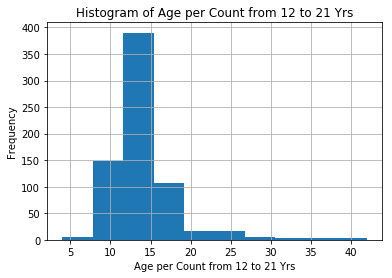

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
age12t21.hist()
plt.title('Histogram of Age per Count from 12 to 21 Yrs')
plt.xlabel('Age per Count from 12 to 21 Yrs')
plt.ylabel('Frequency')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

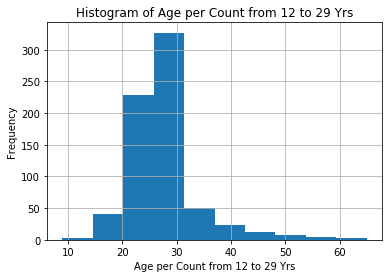

In [56]:
%matplotlib inline
age12t29.hist()
plt.title('Histogram of Age per Count from 12 to 29 Yrs')
plt.xlabel('Age per Count from 12 to 29 Yrs')
plt.ylabel('Frequency')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

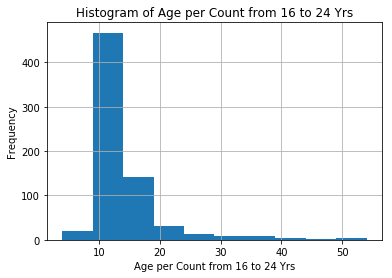

In [57]:
%matplotlib inline
age16t24.hist()
plt.title('Histogram of Age per Count from 16 to 24 Yrs')
plt.xlabel('Age per Count from 16 to 24 Yrs')
plt.ylabel('Frequency')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

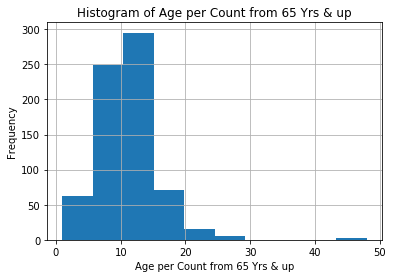

In [58]:
%matplotlib inline
age65up.hist()
plt.title('Histogram of Age per Count from 65 Yrs & up')
plt.xlabel('Age per Count from 65 Yrs & up')
plt.ylabel('Frequency')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

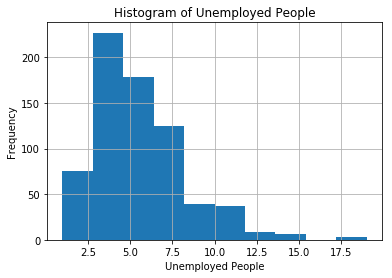

In [59]:
%matplotlib inline
unemployed.hist()
plt.title('Histogram of Unemployed People')
plt.xlabel('Unemployed People')
plt.ylabel('Frequency')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

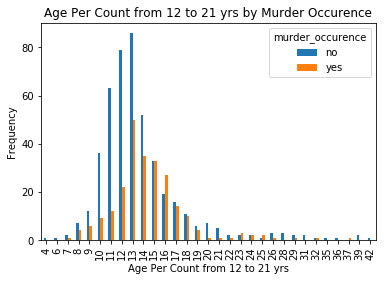

In [60]:
pd.crosstab(age12t21, df.murder_occurence).plot(kind='bar')
plt.title('Age Per Count from 12 to 21 yrs by Murder Occurence')
plt.xlabel('Age Per Count from 12 to 21 yrs')
plt.xticks(rotation='vertical')
plt.ylabel('Frequency')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

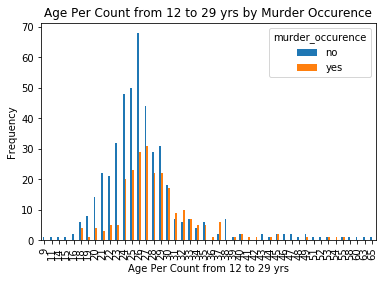

In [61]:
pd.crosstab(age12t29, df1.murder_occurence).plot(kind='bar')
plt.title('Age Per Count from 12 to 29 yrs by Murder Occurence')
plt.xlabel('Age Per Count from 12 to 29 yrs')
plt.xticks(rotation='vertical')
plt.ylabel('Frequency')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

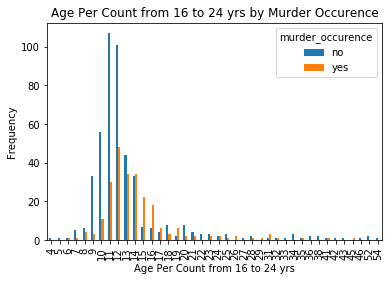

In [62]:
pd.crosstab(age16t24, df1.murder_occurence).plot(kind='bar')
plt.title('Age Per Count from 16 to 24 yrs by Murder Occurence')
plt.xlabel('Age Per Count from 16 to 24 yrs')
plt.xticks(rotation='vertical')
plt.ylabel('Frequency')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

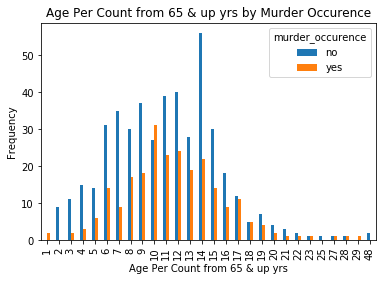

In [63]:
pd.crosstab(age65up, df1.murder_occurence).plot(kind='bar')
plt.title('Age Per Count from 65 & up yrs by Murder Occurence')
plt.xlabel('Age Per Count from 65 & up yrs')
plt.xticks(rotation='vertical')
plt.ylabel('Frequency')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

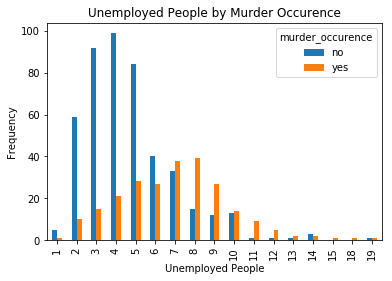

In [64]:
pd.crosstab(unemployed, df1.murder_occurence).plot(kind='bar')
plt.title('Unemployed People by Murder Occurence')
plt.xlabel('Unemployed People')
plt.xticks(rotation='vertical')
plt.ylabel('Frequency')
plt.show

In [65]:
X_NaiveBayes= ['agePct12t21','agePct12t29','agePct16t24', 'agePct65up','PctUnemployed']
Y_NaiveBayes = df1[['murder_occurence']]

In [66]:
X_train_NaiveBayes, X_test_NaiveBayes, Y_train_NaiveBayes, Y_test_NaiveBayes = train_test_split(df1[X_NaiveBayes], Y_NaiveBayes, test_size=0.2, random_state=0)

## Applying the Gaussian Naive Bayes function to construct the model

In [67]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [68]:
model.fit(X_train_NaiveBayes, Y_train_NaiveBayes)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None)

## Model Accuracy

In [69]:
Y_Pred_NaiveBayes = model.predict(X_test_NaiveBayes)
print('Accuracy of Gaussian Naive Bayes classifier on test set: {:.2f}'.format(model.score(X_test_NaiveBayes, Y_test_NaiveBayes)))

Accuracy of Gaussian Naive Bayes classifier on test set: 0.79


## Corelation matrix showing the features

In [70]:
df1[X_NaiveBayes].corr()

,agePct12t21,agePct12t29,agePct16t24,agePct65up,PctUnemployed
agePct12t21,1.000000,0.857899,0.923780,-0.362218,0.219374
agePct12t29,0.857899,1.000000,0.946554,-0.484518,0.159712
agePct16t24,0.923780,0.946554,1.000000,-0.288004,0.141656
agePct65up,-0.362218,-0.484518,-0.288004,1.000000,0.131281
PctUnemployed,0.219374,0.159712,0.141656,0.131281,1.000000


## Corelation Heatmap for better visualization

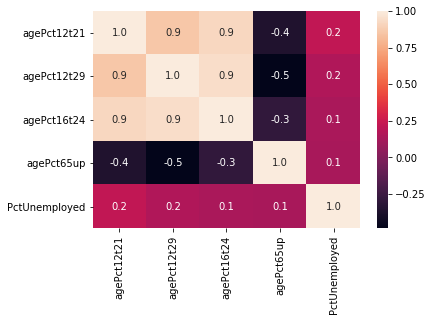

In [71]:
import seaborn as sns
sns.heatmap(df1[X_NaiveBayes].corr(), annot=True, fmt=".1f")
plt.show()

## Confusion Matrix

Model Accuracy for Random Forest: 0.7928571428571428


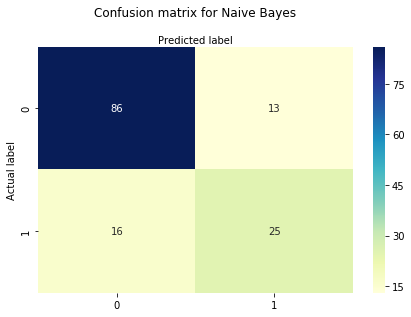

In [72]:
cnf_matrix_NaiveBayes = metrics.confusion_matrix(Y_test_NaiveBayes, Y_Pred_NaiveBayes)
cnf_matrix_NaiveBayes
# name  of classes
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_NaiveBayes), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Naive Bayes', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for Random Forest:",metrics.accuracy_score(Y_test_NaiveBayes, Y_Pred_NaiveBayes))